# pre-processing

In [1]:
#enable autocomplete
%config IPCompleter.greedy=True 

#load packages
import sys #access to system parameters
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
file_path = r"titanic_train.csv"
data = pd.read_csv(file_path)
#complete missing age with median
data['Age'].fillna(data['Age'].median(), inplace = True)

#complete missing fare with median
data['Fare'].fillna(data['Fare'].median(), inplace = True)

#complete embarked with mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace = True)

#complete Cabin with mode
data['Cabin'].fillna(data['Cabin'].mode()[0], inplace = True)

data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

data['IsAlone'] = 1 #initialize to yes/1 is alone
data['IsAlone'].loc[data['FamilySize'] > 1] = 0

def my_regex(x):
    try:
        num = re.search(r'[0-9]+',x)
        return num.group(0)
    except:
        return 0
    return 

data['Cabin Num'] = data.Cabin.apply(lambda x : my_regex(x))    
#data.head()  

x = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age','Fare']]

y = data.Survived

C:\Users\zigi\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


# pca

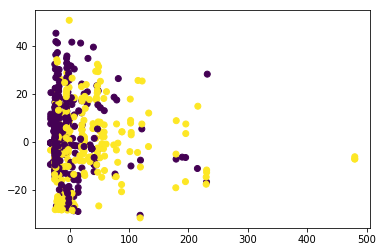

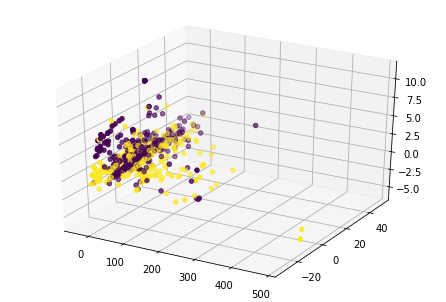

In [2]:
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)  
x_pca = pca.transform(x)

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

#https://stackoverflow.com/questions/1985856/how-to-make-a-3d-scatter-plot-in-python
#3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y)
plt.show()

# Clustering

In [3]:
x_un = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age','Fare']]

y = data.Survived

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_un, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Clustering - KMeans as Supervised

In [5]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(x_train)

kmeans.labels_

y_pred_test = kmeans.predict(x_test)

kmeans.cluster_centers_

from sklearn.metrics import f1_score

f1_score(y_test, y_pred_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test))
print("\n")

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
print("True Negative = " + str(tn))
print("False Positive = " + str(fp))
print("False Negative = " + str(fn))
print("True Positive = " + str(tp))
print("\n")

[[104   1]
 [ 70   4]]


True Negative = 104
False Positive = 1
False Negative = 70
True Positive = 4




## Clustering - KMeans as Un-Supervised

In [6]:
x_un = data[['Cabin Num','IsAlone','FamilySize','Parch','SibSp','Age','Fare']]

y = data.Survived

In [7]:
kmeans = KMeans(n_clusters=5).fit(x_un)
y_pred = kmeans.labels_
cluster_center = kmeans.cluster_centers_

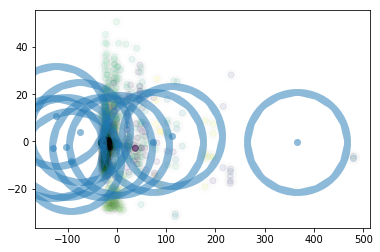

C:\Users\zigi\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


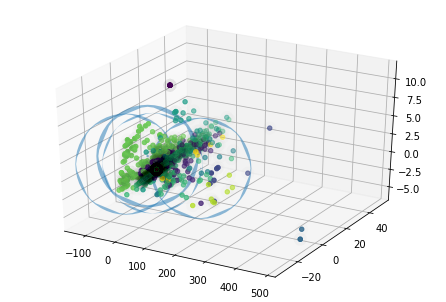

In [49]:
#check result using PCA

pca = PCA(n_components=2)
pca.fit(x_un)  
x_pca = pca.transform(x_un)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

size_y = (y + 1)*50

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,alpha=0.1)#,s = size_y
plt.scatter(x_pca[:,0],x_pca[:,1],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],s = 50,alpha=0.5, linewidth=100)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred)#,s = size_y
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],pca_cluster_center[:,2],alpha=0.5, linewidth=100)
plt.show()


### choose the number of cluster - Elbow method example

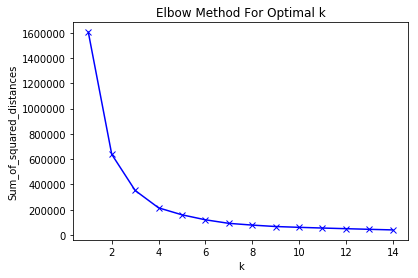

In [9]:
#https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(x_train)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()



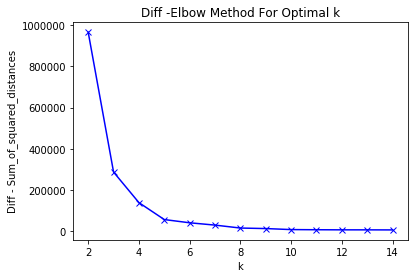

In [10]:
Diff_Sum_of_squared_distances = pd.Series(Sum_of_squared_distances)
Diff_Sum_of_squared_distances = Diff_Sum_of_squared_distances.diff().abs()#.diff().abs()
Diff_Sum_of_squared_distances.dropna(inplace=True)


plt.plot(K[1:], Diff_Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Diff - Sum_of_squared_distances')
plt.title('Diff -Elbow Method For Optimal k')
plt.show()

#Diff_Sum_of_squared_distances

# Clustering - Overview of clustering methods
#https://scikit-learn.org/stable/modules/clustering.html

# silhouette_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

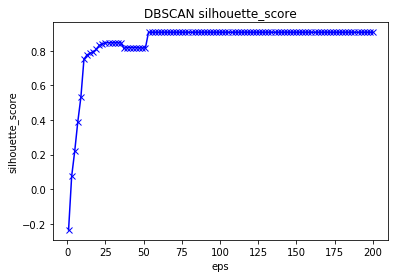

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

silhouette_score_list = []
eps_range = np.linspace(1,200,100)

for eps_val in eps_range:
    dbscan = DBSCAN(eps=eps_val, min_samples=2*x.shape[1]).fit(x)#standard_x
    y_pred = dbscan.labels_
    
    if len(np.unique(y_pred)) > 1:
        dbscan_silhouette_score = silhouette_score(x,y_pred)
        silhouette_score_list.append(dbscan_silhouette_score)
    else:
        silhouette_score_list.append(-1)
    


plt.plot(eps_range, silhouette_score_list, 'bx-')
plt.xlabel('eps')
plt.ylabel('silhouette_score')
plt.title('DBSCAN silhouette_score')
plt.show()

## DBSCAN
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [94]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=65, min_samples=14).fit(x_un)#eps=20, min_samples=1 - eps=20, min_samples=14
y_pred = dbscan.labels_


cluster_center = dbscan.components_
cluster_center.shape
x.shape

(891, 7)

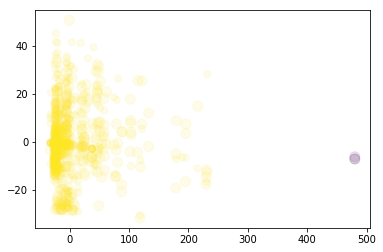

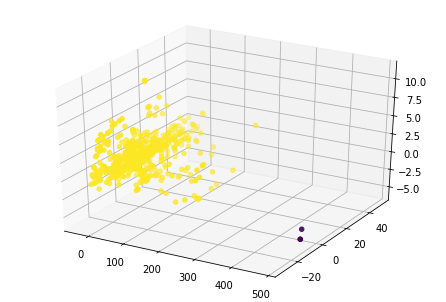

In [95]:
#check result using PCA

pca = PCA(n_components=2)
pca.fit(x_un)  
x_pca = pca.transform(x_un)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

size_y = (y + 1)*50

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,s = size_y,alpha=0.1)
#plt.scatter(x_pca[:,0],x_pca[:,1],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],s = 10,alpha=0.5, linewidth=100)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred)#,s = size_y
#ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],pca_cluster_center[:,2],alpha=0.5, linewidth=100)
plt.show()


In [102]:
#labels_ : array, shape = [n_samples]
#Cluster labels for each point in the dataset given to fit(). Noisy samples are given the label -1.
np.unique(y_pred)

array([-1,  0], dtype=int64)

In [103]:
x_un[y_pred==2].shape

(0, 7)

In [104]:
x_un[y_pred==1]

,Cabin Num,IsAlone,FamilySize,Parch,SibSp,Age,Fare


In [105]:
x_un[y_pred==-1]

,Cabin Num,IsAlone,FamilySize,Parch,SibSp,Age,Fare
258,0,1,1,0,0,35.0,512.3292
679,0,0,2,1,0,36.0,512.3292
737,0,1,1,0,0,35.0,512.3292


In [106]:
data[data.Fare == 512.3292]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Cabin Num
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B96 B98,C,1,1,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,0,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,1,0


In [101]:
data[data.Ticket == 'PC 17755']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Cabin Num
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,B96 B98,C,1,1,0
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,0,0
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,1,1,0


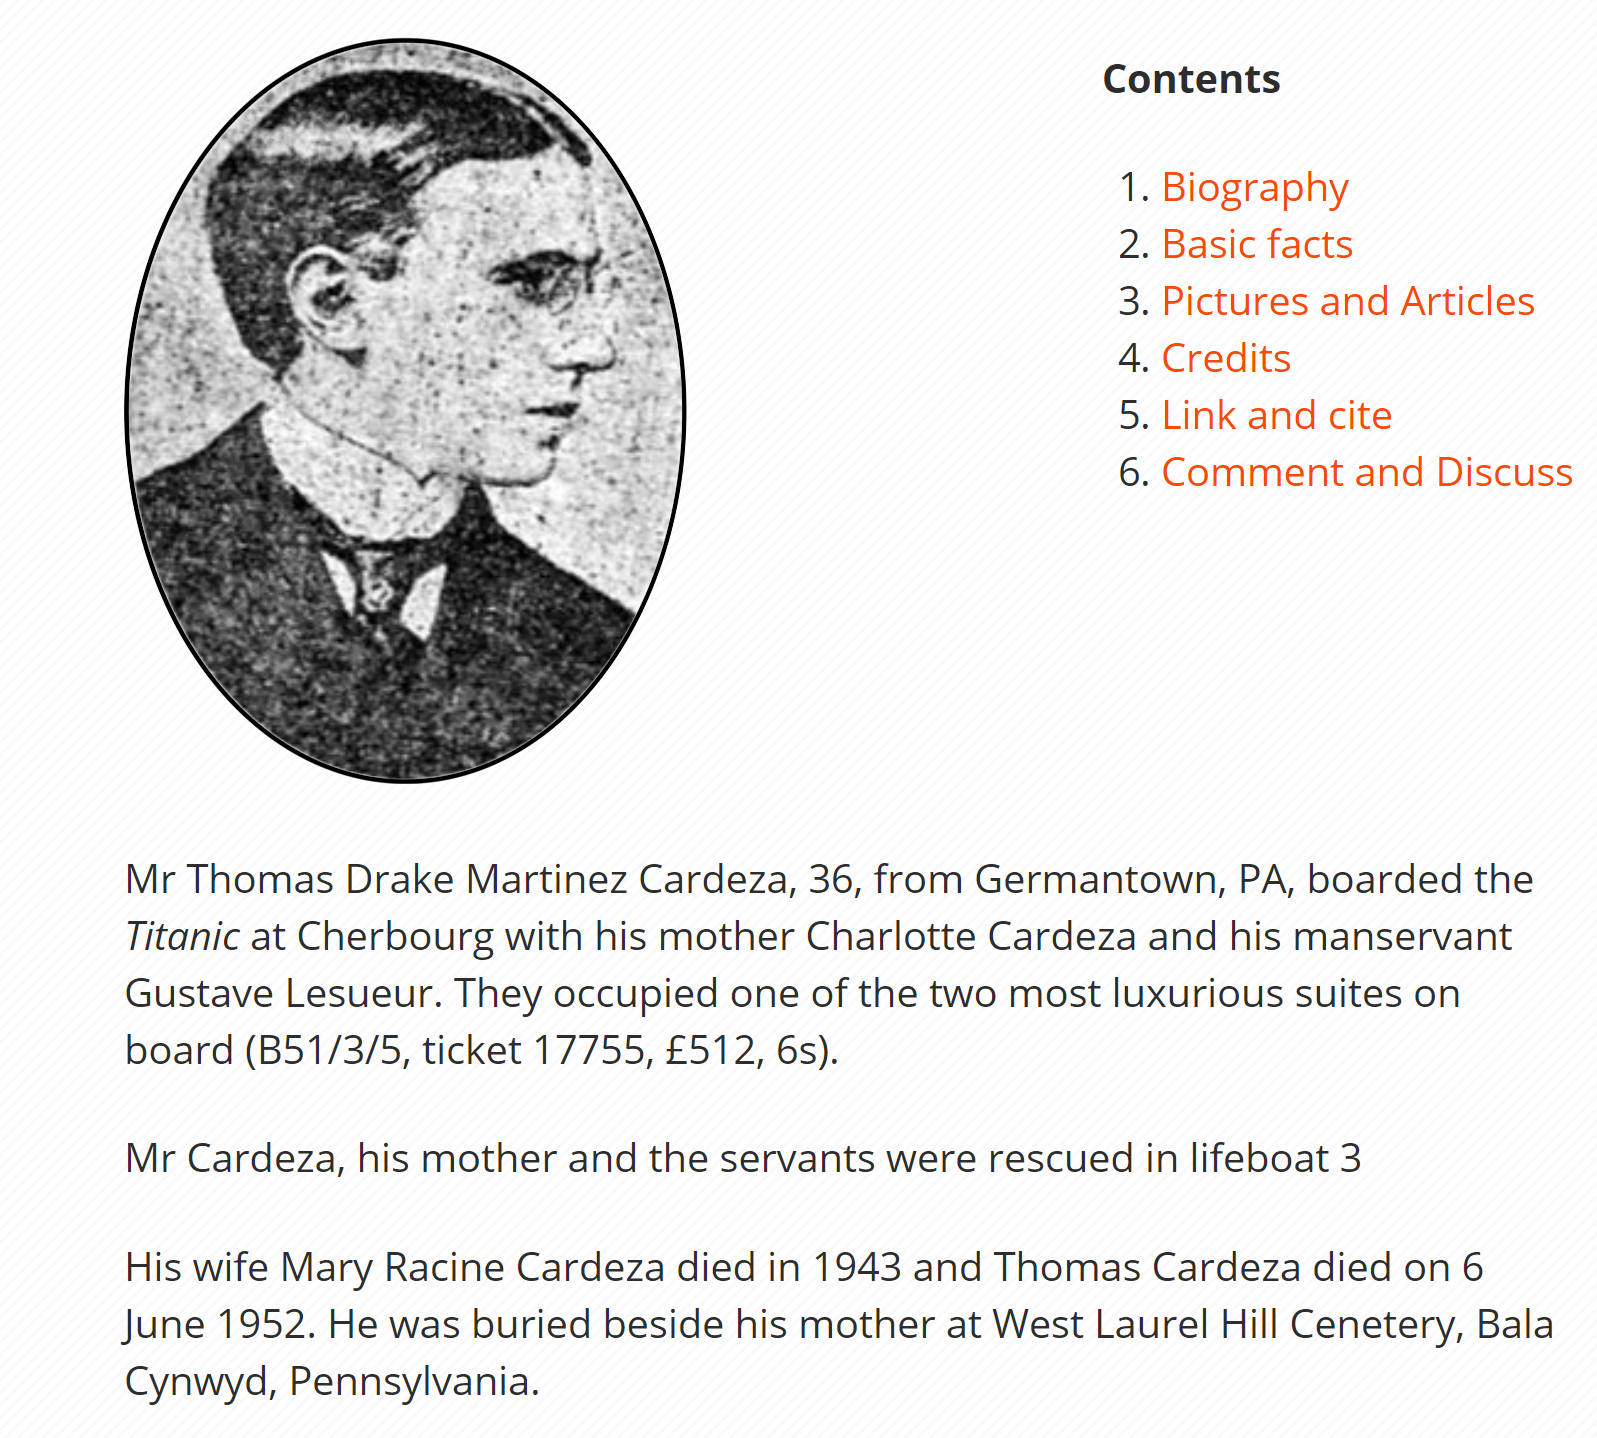

In [93]:
#https://www.encyclopedia-titanica.org/titanic-survivor/thomas-cardeza.html
from IPython.display import Image
Image(filename='‏‏Thomas Drake Martinez.PNG')

## GaussianMixture
#https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#examples-using-sklearn-mixture-gaussianmixture

In [20]:
from sklearn.mixture import GaussianMixture

gaussian_mixture = GaussianMixture(n_components=10).fit(x_un)#, covariance_type='full'
y_pred = gaussian_mixture.predict(x_un)


cluster_center = gaussian_mixture.means_
cluster_center.shape


(10, 7)

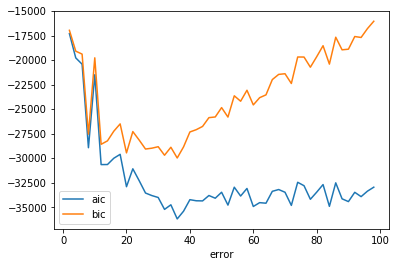

In [21]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
aic_error = list()
bic_error = list()

start_ = 2
stop_ = 100
step_ = 2

for i in range(start_,stop_,step_):
    gaussian_mixture = GaussianMixture(n_components=i).fit(x_un)
    aic_error.append(gaussian_mixture.aic(x_un))
    bic_error.append(gaussian_mixture.bic(x_un))

plt.plot([i for i in range(start_,stop_,step_)],aic_error)
plt.plot([i for i in range(start_,stop_,step_)],bic_error)
plt.xlabel("iteration number")
plt.xlabel("error")
plt.legend(['aic',"bic"])

plt.show()

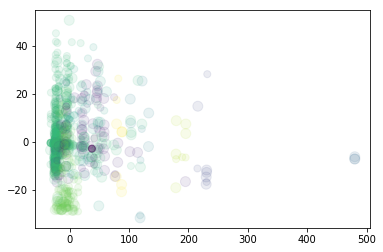

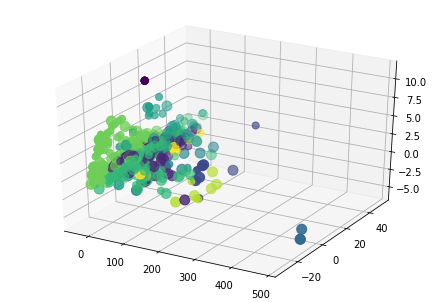

In [22]:
#check result using PCA

pca = PCA(n_components=2)
pca.fit(x_un)  
x_pca = pca.transform(x_un)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

size_y = (y + 1)*50

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,s = size_y,alpha=0.1)
#plt.scatter(x_pca[:,0],x_pca[:,1],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],s = 50,alpha=0.5, linewidth=100)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred,s = size_y)
#ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],pca_cluster_center[:,2],alpha=0.5, linewidth=100)
plt.show()

In [23]:
np.unique(y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [24]:
data[y_pred==2].shape

(8, 15)

In [25]:
data[y_pred==2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Cabin Num
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,6,0,0
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,6,0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,2,0,0
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C,2,0,0
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5,0,0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,6,0,0
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,6,0,0
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,5,0,0


# Hierarchical Clustering

## Hierarchical Clustering - dendrogram

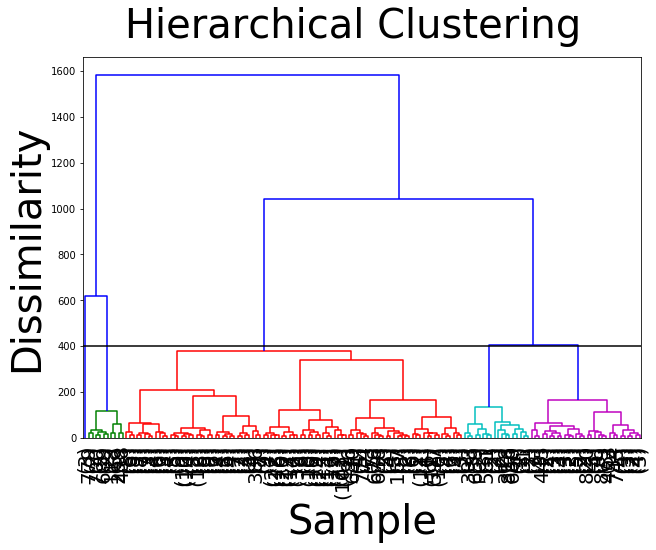

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from sklearn.cluster import AgglomerativeClustering

linked = linkage(x_un, 'ward')
max_d = 400

plt.figure(figsize=(10, 7))  
dendrogram(linked,orientation='top'
           ,distance_sort='descending'
           ,show_leaf_counts=True,leaf_font_size = 20,color_threshold = max_d,truncate_mode='lastp',p=150)
plt.axhline(y=max_d, c='k')
plt.suptitle("Hierarchical Clustering", fontsize=40)
plt.xlabel("Sample",fontdict={'fontsize': 40})
plt.ylabel("Dissimilarity",fontdict={'fontsize': 40})
plt.show()  
 

## Hierarchical Clustering - AgglomerativeClustering

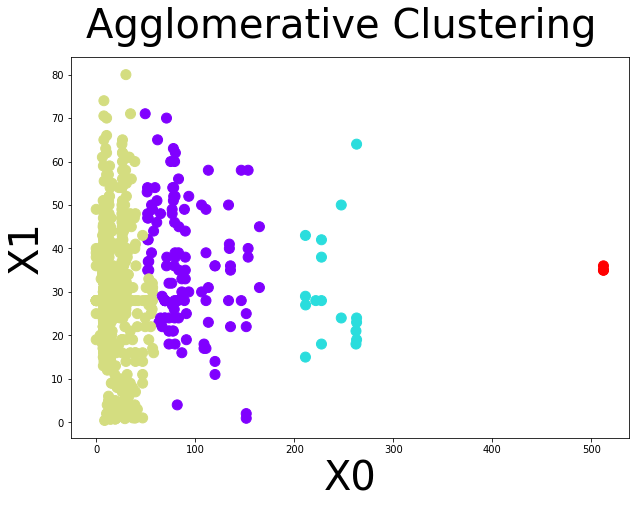

In [27]:
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x_un)  

plt.figure(figsize=(10, 7))  
plt.scatter(x_un.Fare, x_un.Age,s=100, c=cluster.labels_, cmap='rainbow') #'rainbow'
plt.suptitle("Agglomerative Clustering", fontsize=40)
plt.xlabel("X0",fontdict={'fontsize': 40})
plt.ylabel("X1",fontdict={'fontsize': 40}) 
plt.show() 


# SVM - OneClassSVM
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html#sklearn.svm.OneClassSVM

In [80]:
from sklearn.svm import OneClassSVM


svm_clf = OneClassSVM(gamma='auto').fit(x_un)
svm_clf.predict(x_un)








array([-1, -1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1,  1, -1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
       -1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,
        1, -1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1,  1, -1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,  1, -1,
       -1, -1,  1, -1,  1, -1, -1,  1,  1,  1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1,  1,  1,
       -1,  1, -1,  1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1, -1,  1

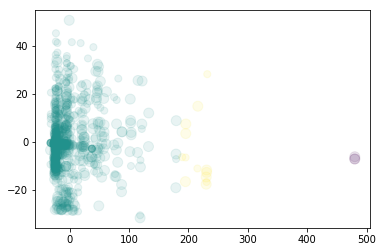

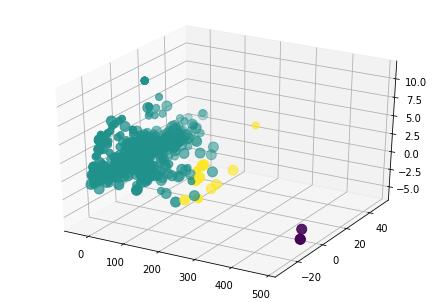

In [81]:
#check result using PCA

pca = PCA(n_components=2)
pca.fit(x_un)  
x_pca = pca.transform(x_un)

pca_cluster_center = PCA(n_components=2)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

size_y = (y + 1)*50

#2D plot
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_pred,s = size_y,alpha=0.1)
#plt.scatter(x_pca[:,0],x_pca[:,1],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],s = 50,alpha=0.5, linewidth=100)
plt.show()

pca = PCA(n_components=3)
pca.fit(x)  
x_pca = pca.transform(x)

pca_cluster_center = PCA(n_components=3)
pca_cluster_center.fit(cluster_center)  
pca_cluster_center = pca_cluster_center.transform(cluster_center)

#3D plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y_pred,s = size_y)
#ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=y,alpha=0.01, edgecolor='black', linewidth=10,s=10)
#plt.scatter(pca_cluster_center[:,0],pca_cluster_center[:,1],pca_cluster_center[:,2],alpha=0.5, linewidth=100)
plt.show()